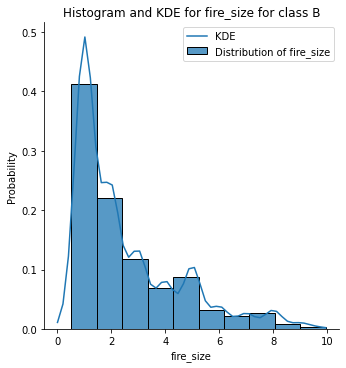

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'B'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

df_sampled = df.loc[df['fire_size_class'] == s_c].reset_index()

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 10)

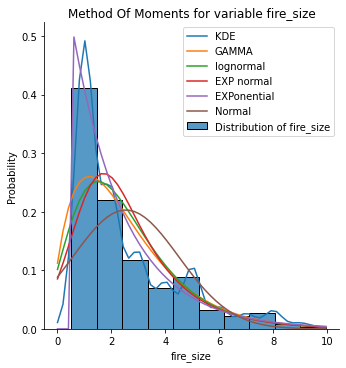

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.7166468440414822), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.11060000000000159, pvalue=0.5441717496790305)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.7166468440414822), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1274000000000015, pvalue=0.47358163672801634)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.7166468440414822), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1034000000000006, pvalue=0.578055087825003)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalue=0.3959398631708505), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.15020000000000167, pvalue=0.39436389982166364)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pval

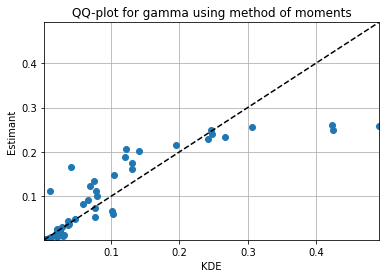

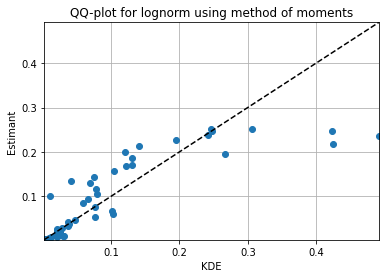

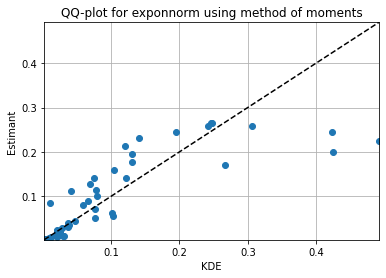

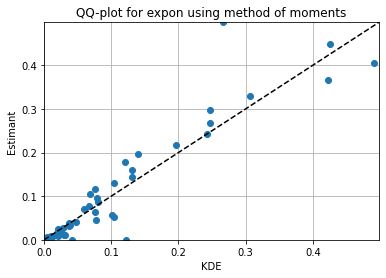

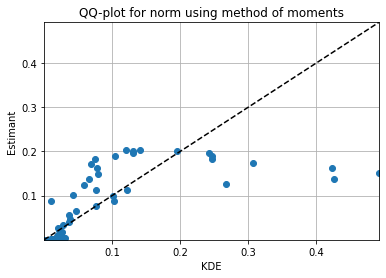

In [2]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 10)

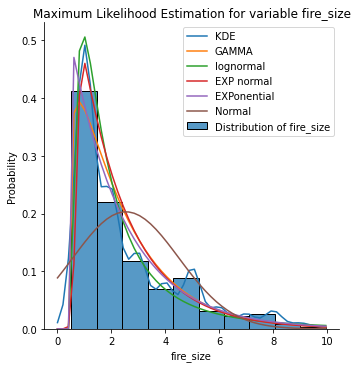

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalue=0.3959398631708505), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.17220000000000013, pvalue=0.3325993319259639)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.22, pvalue=0.17858668181221732), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.2582000000000022, pvalue=0.1796456070337744)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.2, pvalue=0.2719135601522248), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.19180000000000064, pvalue=0.2871733055656991)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1258000000000017, pvalue=0.4798229336666382)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalu

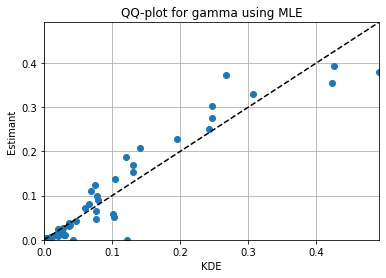

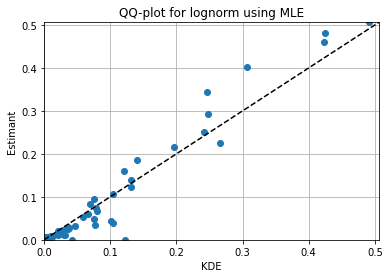

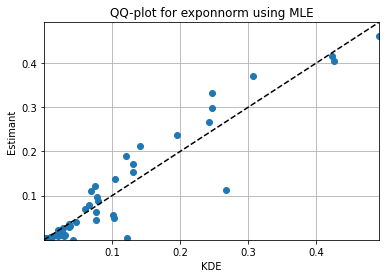

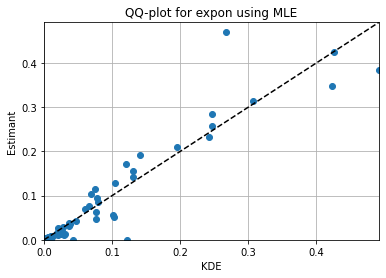

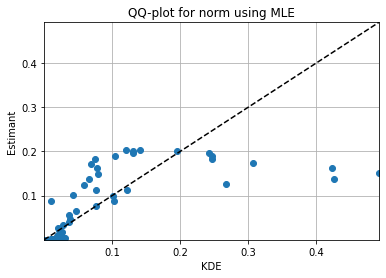

In [3]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 10)

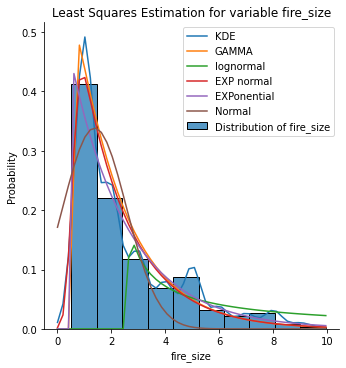

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.22, pvalue=0.17858668181221732), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.2441999999999993, pvalue=0.19770002696435263)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.32, pvalue=0.011511738725894704), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.8426000000000009, pvalue=0.005732438971866705)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalue=0.3959398631708505), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.1518000000000015, pvalue=0.3894283242393094)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.16, pvalue=0.5486851446031328), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.09500000000000242, pvalue=0.6205176723736756)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.48, 

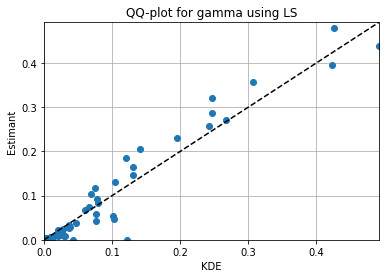

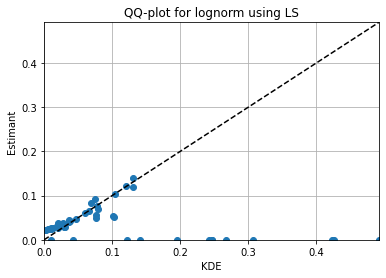

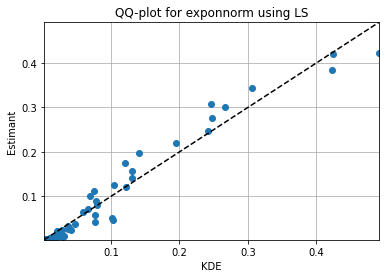

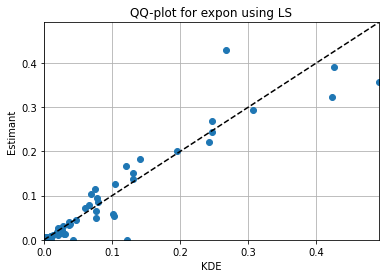

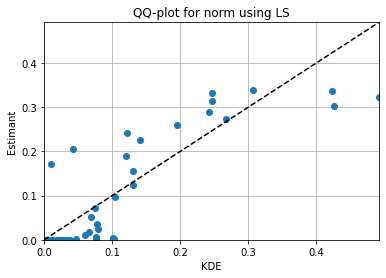

In [4]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 10)

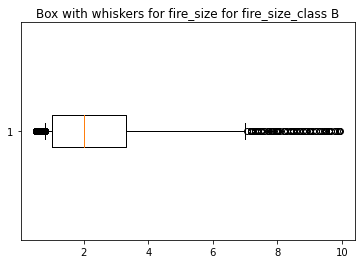

In [5]:
plt.boxplot(df_sampled[property], vert=False, whis=[5,95])
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png', bbox_inches='tight')
plt.show()